## Изучение данных из файлов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# импортируем данные
users = pd.read_csv('datasets/users.csv')
calls = pd.read_csv('datasets/calls.csv')
messages = pd.read_csv('messages.csv')
internet = pd.read_csv('internet.csv')
tariffs = pd.read_csv('tariffs.csv')

In [3]:
display(users.head())
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
display(calls.head())
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
display(messages.head())
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
display(internet.head())
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
display(tariffs.head())
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Проверю аномалии

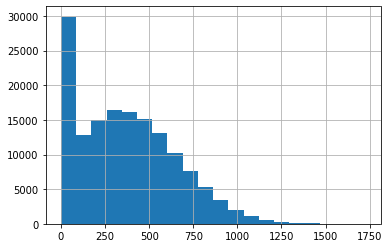

In [8]:
internet['mb_used'].hist(bins=20)

In [9]:
(internet['mb_used'].value_counts() / internet['mb_used'].value_counts().sum()).sort_values()

483.87    0.000007
128.33    0.000007
177.35    0.000007
423.46    0.000007
225.99    0.000007
            ...   
273.45    0.000054
335.91    0.000060
447.30    0.000060
197.56    0.000060
0.00      0.131182
Name: mb_used, Length: 70003, dtype: float64

**Вывод**

Можно заметить, что нам предоставили вполне не плохие данные. Только в таблице users есть пропущенные значения.<br>
Типы столбцов нужно изменить: 

В таблице "users" изменить тип столбца "reg_date" и "churn_date" на datetime64<br>
В таблице "calls" изменить типы столбцов<br>
В таблице "messages" изменить тип столбца "message_date" на datetime64<br>
В таблице "internet" изменить тип столбца и удалить столбец "Unnamed: 0" с дубликатом индексов<br>

Можно увидеть, что у нас целых 13% нулевого трафика

## Подготовка данных

**Проверка дубликатов**

In [10]:
print(users.duplicated().sum())
print(calls.duplicated().sum())
print(messages.duplicated().sum())
print(internet.duplicated().sum())
print(tariffs.duplicated().sum())

0
0
0
0
0


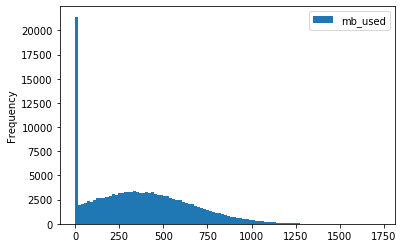

In [11]:
internet.plot(y='mb_used', kind='hist', bins=100)

In [12]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

**Округлим секунды до минут**

In [13]:
calls['duration'] = np.ceil(calls['duration'])
display(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


In [14]:
calls['duration']

0          0.0
1          0.0
2          3.0
3         14.0
4          6.0
          ... 
202602     1.0
202603    19.0
202604    11.0
202605     5.0
202606    20.0
Name: duration, Length: 202607, dtype: float64

**Приведите данные к нужным типам**

In [15]:
# Таблица "users"
# изменим тип столбца "reg_date" и "churn_date" на datetime64
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

# Таблица "calls"
# изменим типы столбцов
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['duration'] = calls['duration'].astype('Int64')

# Таблица "messages"
# изменим тип столбца "message_date" на datetime64
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

# Таблица "internet"
# изменим тип столбца
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
# удаляем столбец "Unnamed: 0" дубликатом индексов
try:
    internet = internet.drop('Unnamed: 0', 1)
except:
    print('already done')
    
display(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


**Добавим столбец с месяцем для таблиц calls, messages, internet**

In [16]:
calls['month_call'] = pd.DatetimeIndex(calls['call_date']).month
display(calls.head())

messages['month_message'] = pd.DatetimeIndex(messages['message_date']).month
display(messages.head())

internet['month_internet'] = pd.DatetimeIndex(internet['session_date']).month
display(internet.head())

,id,call_date,duration,user_id,month_call
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


,id,message_date,user_id,month_message
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


,id,mb_used,session_date,user_id,month_internet
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


Во всех таблицах кроме tariffs были столбцы с датами у которых был тип object. Я изменил на datetime64.<br>
Удалил столбец "Unnamed: 0" в таблице "internet". Так же проверил на наличие дубликатов - не нашел.

### Посчитаем для каждого пользователя:
 - **количество сделанных звонков и израсходованных минут разговора по месяцам**

In [17]:
calls1 = calls.pivot_table(index=['user_id', 'month_call'], values='duration', aggfunc=['sum', 'count']).reset_index()
calls1.columns = ['user_id', 'month', 'sum_min', 'count_calls']
display(calls1)

,user_id,month,sum_min,count_calls
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
...,...,...,...,...
3169,1498,10,247,41
3170,1499,9,70,9
3171,1499,10,449,68
3172,1499,11,612,74


 - **количество отправленных сообщений по месяцам**

In [18]:
messages1 = messages.pivot_table(index=['user_id', 'month_message'], values='id', aggfunc='count').reset_index()
messages1.columns = ['user_id', 'month', 'count_sms']
display(messages1)

,user_id,month,count_sms
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


 - **объем израсходованного интернет-трафика по месяцам**

In [19]:
internet1 = internet.pivot_table(index=['user_id', 'month_internet'], values='mb_used', aggfunc='sum').reset_index()
internet1.columns = ['user_id', 'month', 'mb_used']
display(internet1)

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


 - **помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)**

Объединим таблицы в одну и обработаем данные, уберя пропуски и приведя к нужному типу

In [20]:
# создаём таблицу только с user_id и tariff
users_and_tarrif = users.loc[:, ['user_id', 'tariff']]

In [21]:
# создадим соединенную таблицу
general = calls1.merge(messages1, on=['user_id', 'month'], how='outer')
general = general.merge(internet1, on=['user_id', 'month'], how='outer')
general = general.merge(users_and_tarrif, on='user_id', how='outer')

# заполним пропуски
general['sum_min'] = general['sum_min'].fillna(0)
general['count_calls'] = general['count_calls'].fillna(0)
general['count_sms'] = general['count_sms'].fillna(0)
general['mb_used'] = general['mb_used'].fillna(0)

# приводим к нужному типу
general['count_calls'] = general['count_calls'].astype('Int64')
general['count_sms'] = general['count_sms'].astype('Int64')
general['month'] = general['month'].astype('Int64')
general

,user_id,month,sum_min,count_calls,count_sms,mb_used,tariff
0,1000,5,159,22,22,2253.49,ultra
1,1000,6,172,43,60,23233.77,ultra
2,1000,7,340,47,75,14003.64,ultra
3,1000,8,408,52,81,14055.93,ultra
4,1000,9,466,58,57,14568.91,ultra
...,...,...,...,...,...,...,...
3211,1489,10,0,0,21,19559.44,smart
3212,1489,11,0,0,20,17491.56,smart
3213,1489,12,0,0,35,17322.51,smart
3214,1128,NaN,0,0,0,0.00,ultra


In [22]:
general.user_id.unique().shape

(500,)

In [23]:
# Переводим мегабайты в гигабайты
general['mb_used'] = general['mb_used'] / 1024

In [24]:
# округлим в большую сторону потраченный за месяц трафик 
general['mb_used'] = (general['mb_used'].apply(np.ceil)).astype('Int64')

# переименуем столбец 'mb_used' в 'gb_used'
general.rename(columns={'mb_used': 'gb_used'}, inplace=True)
display(general)

,user_id,month,sum_min,count_calls,count_sms,gb_used,tariff
0,1000,5,159,22,22,3,ultra
1,1000,6,172,43,60,23,ultra
2,1000,7,340,47,75,14,ultra
3,1000,8,408,52,81,14,ultra
4,1000,9,466,58,57,15,ultra
...,...,...,...,...,...,...,...
3211,1489,10,0,0,21,20,smart
3212,1489,11,0,0,20,18,smart
3213,1489,12,0,0,35,17,smart
3214,1128,NaN,0,0,0,0,ultra


Теперь создадим функцию подсчёта

In [25]:
def money(data):
    
    if data['tariff'] == 'ultra':
        sum_min = 0
        sum_sms = 0
        sum_internet = 0
        
        minutes = data['sum_min'] - 3000
        if minutes > 0:
            sum_min = minutes * 1

        sms = data['count_sms'] - 1000
        if sms > 0:
            sum_sms = sms * 1

        internets = data['gb_used'] - 30
        if internets > 0:
            sum_internet = internets * 150

        return (sum_min + sum_sms + sum_internet + 1950)
    elif data['tariff'] == 'smart':
        sum_min = 0
        sum_sms = 0
        sum_internet = 0
        
        minutes = data['sum_min'] - 500
        if minutes > 0:
            sum_min = minutes * 3

        sms = data['count_sms'] - 50
        if sms > 0:
            sum_sms = sms * 3

        internets = data['gb_used'] - 15
        if internets > 0:
            sum_internet = internets * 200

        return (sum_min + sum_sms + sum_internet + 550)

Применяем метод

In [26]:
general['cost'] = general.apply(money, axis=1)

In [27]:
general

,user_id,month,sum_min,count_calls,count_sms,gb_used,tariff,cost
0,1000,5,159,22,22,3,ultra,1950
1,1000,6,172,43,60,23,ultra,1950
2,1000,7,340,47,75,14,ultra,1950
3,1000,8,408,52,81,14,ultra,1950
4,1000,9,466,58,57,15,ultra,1950
...,...,...,...,...,...,...,...,...
3211,1489,10,0,0,21,20,smart,1550
3212,1489,11,0,0,20,18,smart,1150
3213,1489,12,0,0,35,17,smart,950
3214,1128,NaN,0,0,0,0,ultra,1950


## Проанализируем данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [28]:
# создадим две раздельные таблицы
general_smart = general[general['tariff'] == 'smart']
general_ultra = general[general['tariff'] == 'ultra']

In [29]:
data = {'smart' : general_smart.groupby('month')['cost'].sum(), 
       'ultra' : general_ultra.groupby('month')['cost'].sum()}
pd.DataFrame(data)

,smart,ultra
month,,
1,24525,17550
2,48001,47400
3,89676,74550
4,107866,110100
5,168849,138000
6,197459,171300
7,246014,192750
8,310340,222900
9,324986,232800


Можно пронаблюдать, что по обоим тарифам растёт выручка, но по тарифу "Смарт" она растёт быстрее

### Минуты

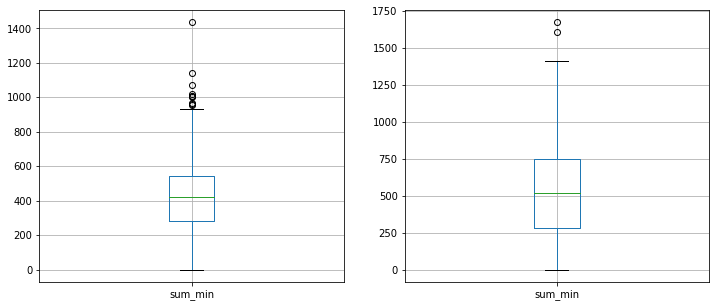

In [30]:
# среднее колличество 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
plt.subplot(1,2,1)
general_smart.boxplot(column='sum_min')
plt.subplot(1,2,2)
general_ultra.boxplot(column='sum_min')
plt.show()

In [31]:
# Дисперсия
print('Дисперсия для smart равна', np.var(general_smart['sum_min']))
print('Дисперсия для ultra равна', np.var(general_ultra['sum_min']))

Дисперсия для smart равна 36281.39383644458
Дисперсия для ultra равна 101052.49354928387


In [32]:
# Стандартное отклонение
print('Стандартное отклонение для smart равно', np.sqrt(np.var(general_smart['sum_min'])))
print('Стандартное отклонение для ultra равно', np.sqrt(np.var(general_ultra['sum_min'])))

Стандартное отклонение для smart равно 190.4767540579285
Стандартное отклонение для ultra равно 317.8875485911392


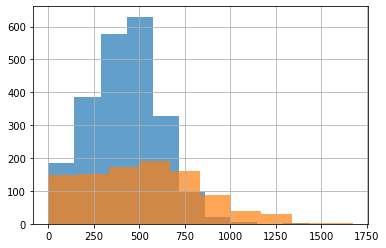

In [33]:
# гистограмма
general_smart['sum_min'].hist(alpha=0.7, label='smart')
general_ultra['sum_min'].hist(alpha=0.7, label='ultra')

Итак, можно увидеть, что в среднем пользователи тарифа 'smart' используют 300-500 минут. Медиана равняется 422 минут. 
Дисперсия равняется 36219, а среднее стандартное отклонение равняется 190.<br>
В среднем пользователи тарифа 'ultra' используют 300-750 минут. Медиана равняется 518 минут. Дисперсия равняется 100873, а среднее стандартное отклонение равняется 317. Так же очень много пользователей, которые за месяц вообще не разговаривают по телефону.<br>

Намного больше дохода приносит тариф smart

### Сообщения

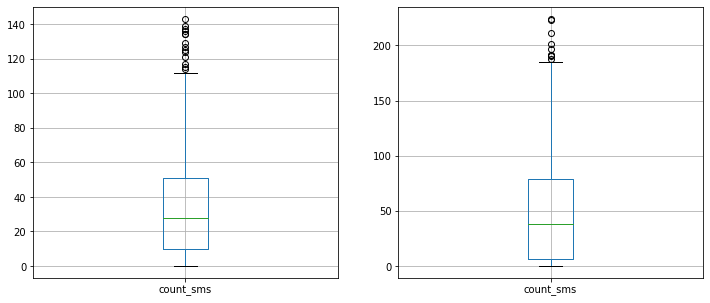

28.0
38.0


In [34]:
# среднее колличество 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
plt.subplot(1,2,1)
general_smart.boxplot(column='count_sms')
plt.subplot(1,2,2)
general_ultra.boxplot(column='count_sms')
plt.show()

print(general_smart['count_sms'].median())
print(general_ultra['count_sms'].median())

In [35]:
# Дисперсия
print('Дисперсия для smart равна', np.var(general_smart['count_sms']))
print('Дисперсия для ultra равна', np.var(general_ultra['count_sms']))

Дисперсия для smart равна 796.9552557301129
Дисперсия для ultra равна 2285.4174246558414


In [36]:
# Стандартное отклонение
print('Стандартное отклонение для smart равно', np.sqrt(np.var(general_smart['count_sms'])))
print('Стандартное отклонение для ultra равно', np.sqrt(np.var(general_ultra['count_sms'])))

Стандартное отклонение для smart равно 28.230395954185852
Стандартное отклонение для ultra равно 47.80603962530092


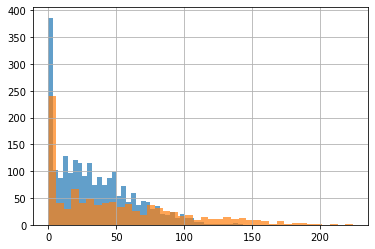

In [37]:
# гистограмма
general_smart['count_sms'].hist(bins=40, alpha=0.7, label='smart')
general_ultra['count_sms'].hist(bins=40, alpha=0.7, label='ultra')

Можно увидеть, что в среднем пользователи тарифа 'smart' отправляют 10-50 сообщений. Медиана равняется 28 сообщений. Дисперсия равняется 796, а среднее стандартное отклонение равняется 28. <br> 
Но большинство пользователей за месяц вообще не отправляли сообщения. 

Можно увидеть, что в среднем пользователи тарифа 'ultra' отправляют 10-80 сообщений. Медиана равняется 38 сообщений. Дисперсия равняется 2285, а среднее стандартное отклонение равняется 47. <br> 
Но большинство пользователей за месяц вообще не отправляли сообщения.

### Интернет

**Интернет для смарт**

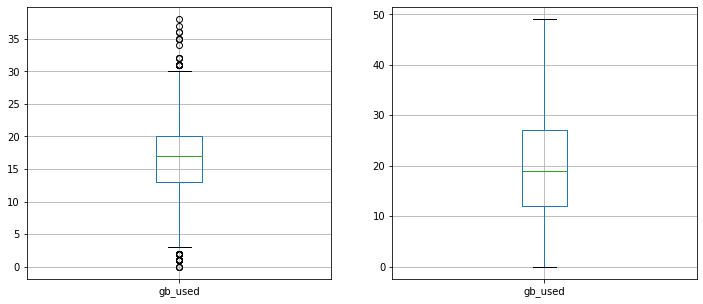

17.0
19.0


In [38]:
# среднее колличество 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
plt.subplot(1,2,1)
general_smart.boxplot(column='gb_used')
plt.subplot(1,2,2)
general_ultra.boxplot(column='gb_used')
plt.show()

print(general_smart['gb_used'].median())

print(general_ultra['gb_used'].median())


In [39]:
# Дисперсия
print('Дисперсия для smart равна', np.var(general_smart['gb_used']))
print('Дисперсия для ultra равна', np.var(general_ultra['gb_used']))

Дисперсия для smart равна 33.133453035506285
Дисперсия для ultra равна 97.37854429011234


In [40]:
# Стандартное отклонение
print('Стандартное отклонение для smart равно', np.sqrt(np.var(general_smart['gb_used'])))
print('Стандартное отклонение для ultra равно', np.sqrt(np.var(general_ultra['gb_used'])))

Стандартное отклонение для smart равно 5.7561665225657155
Стандартное отклонение для ultra равно 9.868056763624352


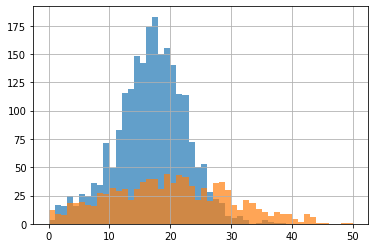

In [41]:
# гистограмма
general_smart['gb_used'].hist(bins=50, range=(0,50), alpha=0.7, label='smart')
general_ultra['gb_used'].hist(bins=50, range=(0,50), alpha=0.7, label='ultra')

Можно увидеть, что в среднем пользователи тарифа 'smart' используют 13-22 гб в месяц. Медиана равняется 17 гб. Дисперсия равняется 34, а среднее стандартное отклонение равняется 5.8. <br>

Можно увидеть, что в среднем пользователи тарифа 'ultra' используют 10-29 гб в месяц. Медиана равняется 20 гб. Дисперсия равняется 102, а среднее стандартное отклонение равняется 10.

## Проверим гипотезы
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задам самостоятельно.

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

Выдвигаем нулевую гипотезу, что выручка пользователей тарифов «Ультра» и «Смарт» равна.

Альтернативная гипотеза звучит так: "Выручка пользователей тарифов «Ультра» и «Смарт» различается"

In [42]:
# гипотеза о равенстве средних двух генеральных совокупностей
smart = general_smart['cost']
ultra = general_ultra['cost']
 
alpha = 0.05
 
 
results = st.ttest_ind(
   smart, 
   ultra)
 
print('p-значение: ', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  8.081909555489931e-161
Отвергаем нулевую гипотезу


*Отвергаем нулевую гипотезу*

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Выдвигаем нулевую гипотезу, что средняя выручка пользователей из Москвы равна выручки пользователей из других регионов.

Альтернативная гипотеза звучит так: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов."

Добавим в нашу таблицу general столбец с городами

In [43]:
# создаём таблицу только с user_id и city
users_and_city = users.loc[:, ['user_id', 'city']]

In [44]:
# добавляем в таблицу general
general = general.merge(users_and_city, on='user_id', how='left')

In [45]:
moscow = general[general['city'] == 'Москва']['cost']
other = general[general['city'] != 'Москва']['cost']
 
alpha = 0.05
 
 
results = st.ttest_ind(
   moscow, 
   other)
 
print('p-значение: ', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


Получается, что средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов.

In [46]:
moscow.median()

1750.0

In [47]:
other.median()

1583.0

## Общий вывод

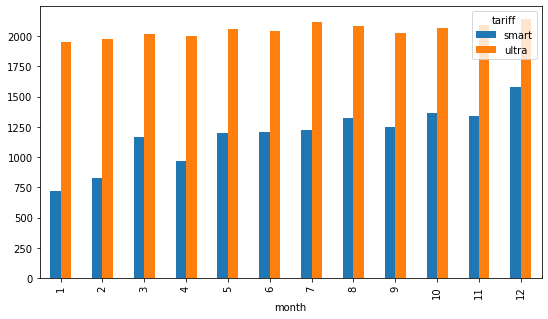

In [49]:
a = general.pivot_table(index='month', columns='tariff', values='cost', aggfunc='mean').plot(kind='bar', figsize=(9, 5))

Можно сделать вывод, что большинство пользователей тарифа smart доплачивают за тариф, но все равно в среднем получается, что траты за месяц меньше, чем стоимость тарифа ultra. <br>

Отсюда можно сделать вывод, что не смотря на то, что вы будете доплачивать, тариф smart является более выгодным, чем тариф ultra.

In [48]:
print('Общая выручка от тарифа smart:', general_smart['cost'].sum())
print('Общая выручка от тарифа ultra:', general_ultra['cost'].sum())

Общая выручка от тарифа smart: 2875901
Общая выручка от тарифа ultra: 2041050


Можно увидеть, что выручка от пользователей тарифа Smart больше на 834 851 рублей, имеет смысл вкладывать в тариф Smart.